#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Import Dataset
dataset = pd.read_csv('datasets/datasets/titanic_train.csv')


In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
pd.unique(dataset['Survived'])

array([0, 1], dtype=int64)

In [8]:
pd.unique(dataset['Pclass'])

array([3, 1, 2], dtype=int64)

In [9]:
pd.unique(dataset['Sex'])

array(['male', 'female'], dtype=object)

In [10]:
pd.unique(dataset['Parch'])

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
pd.unique(dataset['SibSp'])

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

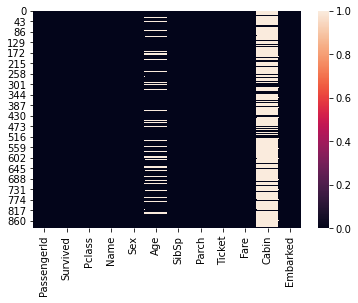

In [13]:
sns.heatmap(dataset.isnull())

In [14]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

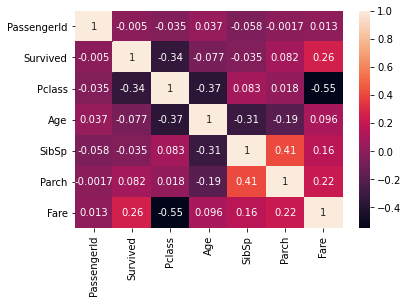

In [15]:
sns.heatmap(dataset.corr(),annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

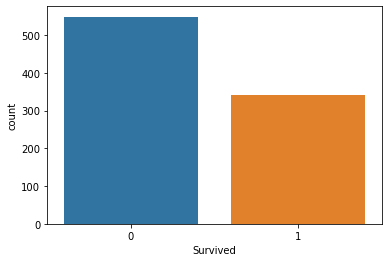

In [16]:
sns.countplot(x='Survived',data=dataset)

In [17]:
dataset.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

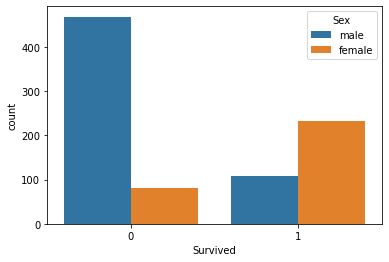

In [18]:
sns.countplot(x='Survived',hue='Sex',data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

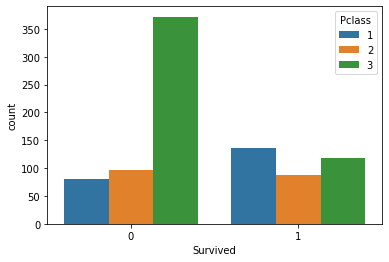

In [19]:
sns.countplot(x='Survived',hue='Pclass',data=dataset)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

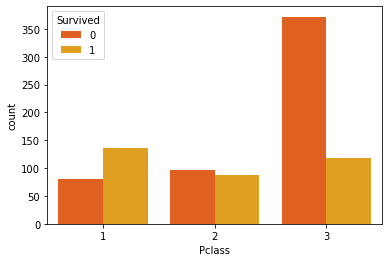

In [20]:
sns.countplot(x='Pclass',hue='Survived',data=dataset,palette='autumn')

<AxesSubplot:ylabel='Age'>

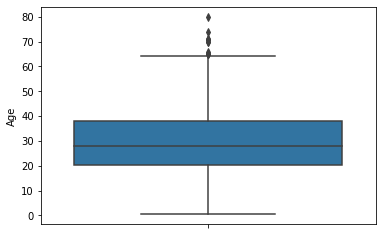

In [21]:
sns.boxplot(y='Age',data=dataset)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

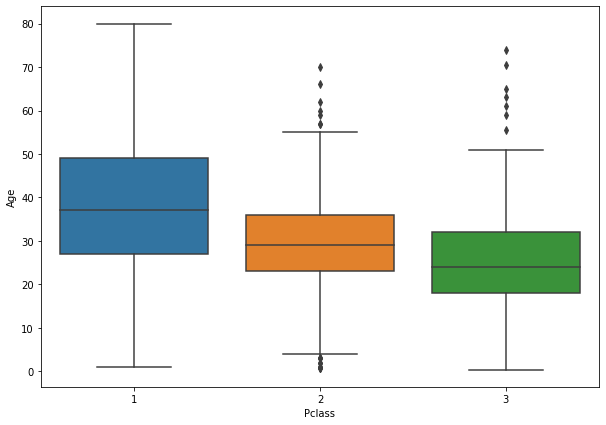

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=dataset)

#### Data Preprocessing

In [23]:
## age-pclass
dataset[['Pclass','Age']].groupby(['Pclass'],as_index=False).median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:return Age
        
     
    

In [25]:
dataset['Age']= dataset[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

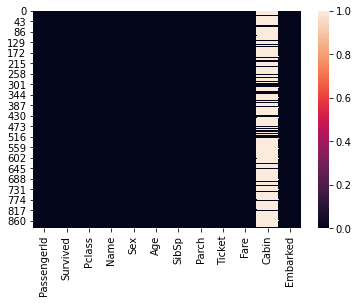

In [26]:
sns.heatmap(dataset.isnull())

In [27]:
dataset.drop('Cabin',axis=1,inplace=True)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
pd.unique(dataset.Sex)

array(['male', 'female'], dtype=object)

In [30]:
pd.unique(dataset.Embarked)

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
dataset.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [32]:
common_value='S'
dataset['Embarked']= dataset['Embarked'].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [33]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)

In [34]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [35]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [36]:
dataset.shape

(891, 9)

In [37]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
## Model Building
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1), 
                                                    dataset['Survived'], test_size=0.20, 
                                                    random_state=101)

### Logistic Regression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred = logmodel.predict(x_test)
acc_log = (logmodel.score(x_train,y_train)*100)
print(acc_log)

80.89887640449437


C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K Nearest Neighbor

In [40]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc_knn = (model.score(x_train,y_train)*100)
print(acc_knn)

84.12921348314607


### Naive Bayes

In [41]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc_naivebayes=(classifier.score(x_train,y_train)*100)
print(acc_naivebayes)

78.51123595505618


### Support Vector Machine

In [42]:
model=SVC(kernel='linear',probability=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_svm=(model.score(x_train,y_train)*100)
print(acc_svm)

78.51123595505618


### RandomForest

In [43]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_random=(model.score(x_train,y_train)*100)
print(acc_random)


98.59550561797754


In [52]:
rank=pd.DataFrame({
    'Model':['Logistic regression','Naive Bayes','Support Vector Machine ','KNN','Random Forest'],
    'Score':['acc_log','acc_naivebayes','acc_svm','acc_knn','acc_random']
})


In [53]:
rank={'Model':['Logistic regression','Naive Bayes','Support Vector Machine ','KNN','Random Forest'],
    'Score':[80.89,78.51,78.5,84.12,98.59]}
    
df=pd.DataFrame(rank)
print(df)

                     Model  Score
0      Logistic regression  80.89
1              Naive Bayes  78.51
2  Support Vector Machine   78.50
3                      KNN  84.12
4            Random Forest  98.59
